In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# read data
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [5]:
df.shape

(200, 5)

In [6]:
df.columns[2:]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


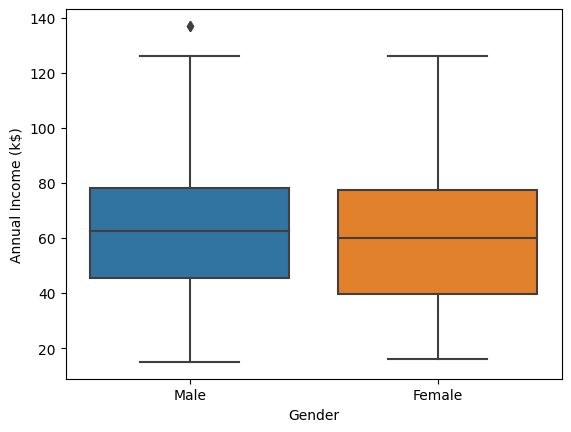

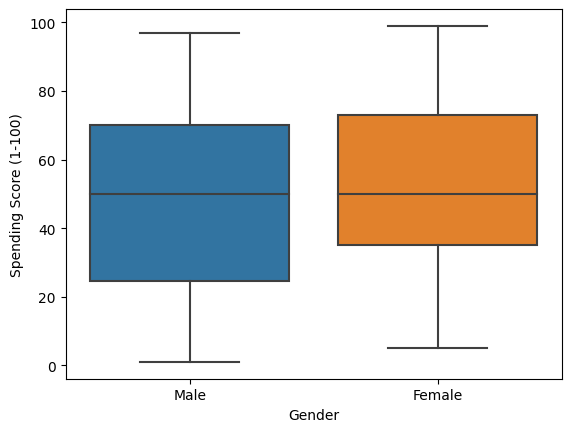

In [8]:
# box plot

for i in df.columns[3:]:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

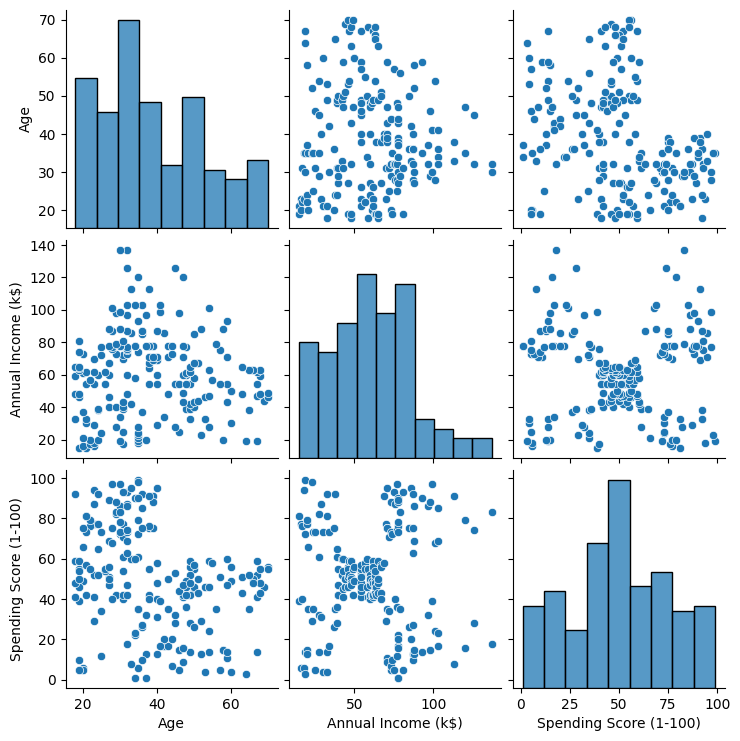

In [9]:
sns.pairplot(df.drop(['CustomerID'],axis=1))

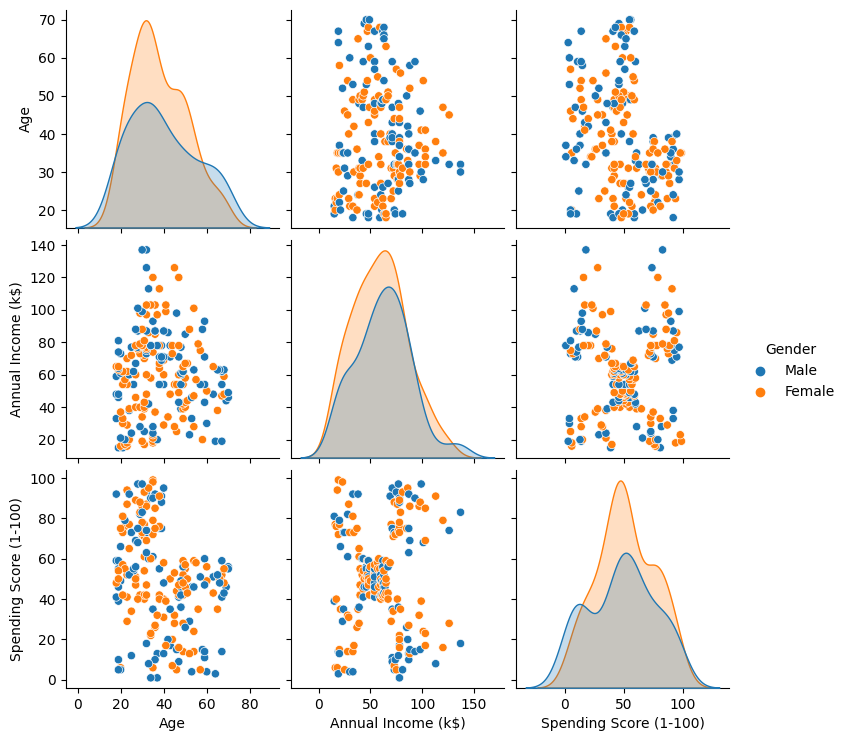

In [10]:
sns.pairplot(df.drop(['CustomerID'],axis=1),hue='Gender')

In [11]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

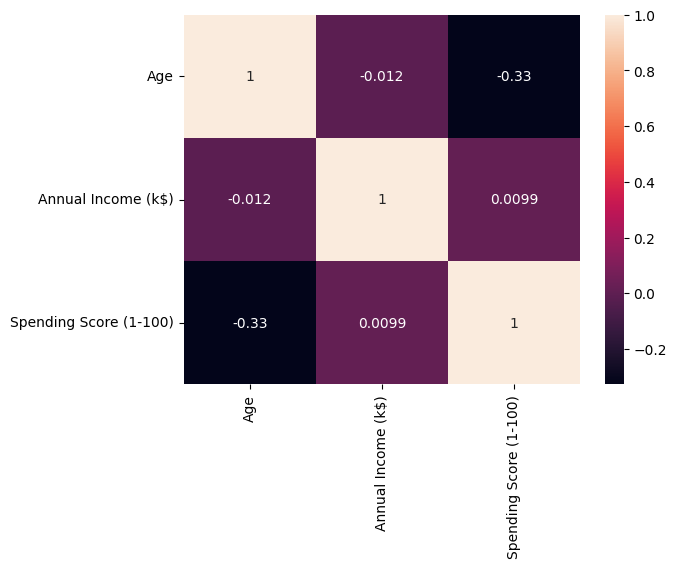

In [12]:
dff=df.drop(['CustomerID'],axis=1)
sns.heatmap(dff.corr(),annot=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
# scaled age, income,spending score data

df1=df.iloc[:, 2:]
x=scale.fit_transform(df1)

In [14]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [15]:
x.shape

(200, 3)

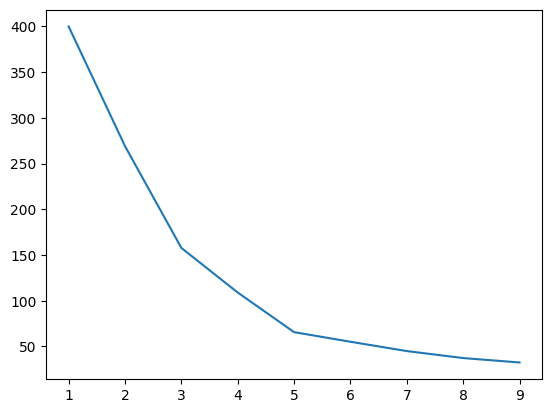

In [16]:
# two fearures only selected income and spending score
intertia=[]
for i in range(1,10):
    clus = KMeans(n_clusters=i)
    clus.fit(x[0:,1:])
    intertia.append(clus.inertia_)
plt.plot(range(1,10),intertia);

### optimum number of cluster == 5

In [17]:
# k_mean cluster using two features income and spending score
clus1 = KMeans(n_clusters=5)
clus1.fit(x[0:,1:])
y=clus1.predict(x[0:,1:])

In [18]:
# scaled data added dataframe

df1[['scale_age','scale_Annual_Income','scale_Spending_Score']]=x
df1['cluster_1']=y
df1

,Age,Annual Income (k$),Spending Score (1-100),scale_age,scale_Annual_Income,scale_Spending_Score,cluster_1
0,19,15,39,-1.424569,-1.738999,-0.434801,4
1,21,15,81,-1.281035,-1.738999,1.195704,3
2,20,16,6,-1.352802,-1.700830,-1.715913,4
3,23,16,77,-1.137502,-1.700830,1.040418,3
4,31,17,40,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...,...,...,...
195,35,120,79,-0.276302,2.268791,1.118061,2
196,45,126,28,0.441365,2.497807,-0.861839,1
197,32,126,74,-0.491602,2.497807,0.923953,2
198,32,137,18,-0.491602,2.917671,-1.250054,1


In [19]:
s1=df1[df1['cluster_1']==0]
s2=df1[df1['cluster_1']==1]
s3=df1[df1['cluster_1']==2]
s4=df1[df1['cluster_1']==3]
s5=df1[df1['cluster_1']==4]

In [20]:
# Kmean centers of income and spending score features
clus1.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

Text(0, 0.5, 'scale_Spending_Score')

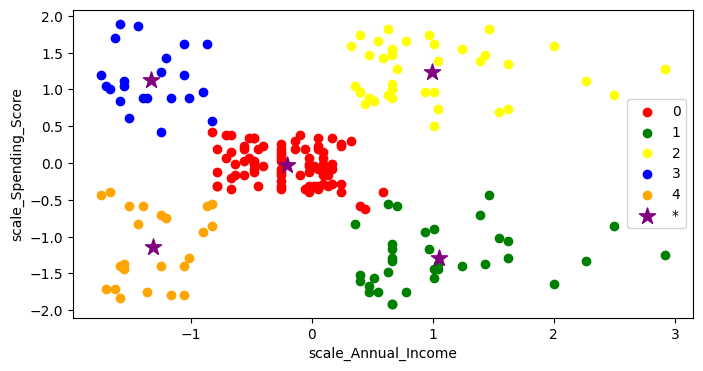

In [21]:
# scatter plot and centers

plt.figure(figsize=(8,4))
plt.scatter(s1.scale_Annual_Income,s1.scale_Spending_Score,color='red',label='0')
plt.scatter(s2.scale_Annual_Income,s2.scale_Spending_Score,color='green',label='1')
plt.scatter(s3.scale_Annual_Income,s3.scale_Spending_Score,color='yellow',label='2')
plt.scatter(s4.scale_Annual_Income,s4.scale_Spending_Score,color='blue',label='3')
plt.scatter(s5.scale_Annual_Income,s5.scale_Spending_Score,color='orange',label='4')
plt.scatter(clus1.cluster_centers_[:,0],clus1.cluster_centers_[:,1],color='purple',s=150,marker='*',label='*')
plt.legend()
plt.xlabel('scale_Annual_Income')
plt.ylabel('scale_Spending_Score')

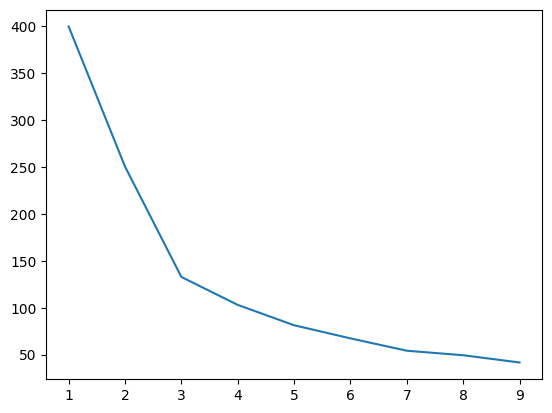

In [22]:
# Finging lebow using age and income
intertia=[]
for i in range(1,10):
    clus = KMeans(n_clusters=i)
    clus.fit(df1[['scale_age','scale_Annual_Income']])
    intertia.append(clus.inertia_)
plt.plot(range(1,10),intertia);

### optimum number of cluster == 3

In [23]:
# Kmeans with age and income
km=KMeans(n_clusters=3)
y_pred = km.fit_predict(df1[['scale_age','scale_Annual_Income']])
df1['cluster_2'] = y_pred 
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),scale_age,scale_Annual_Income,scale_Spending_Score,cluster_1,cluster_2
0,19,15,39,-1.424569,-1.738999,-0.434801,4,1
1,21,15,81,-1.281035,-1.738999,1.195704,3,1
2,20,16,6,-1.352802,-1.700830,-1.715913,4,1
3,23,16,77,-1.137502,-1.700830,1.040418,3,1
4,31,17,40,-0.563369,-1.662660,-0.395980,4,1


In [24]:
# spilt data with three clusters
a1=df1[df1['cluster_2']==0]
a2=df1[df1['cluster_2']==1]
a3=df1[df1['cluster_2']==2]

In [25]:
km.cluster_centers_

array([[-0.27913465,  0.96851913],
       [-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084]])

Text(0, 0.5, 'scale_Annual_Income')

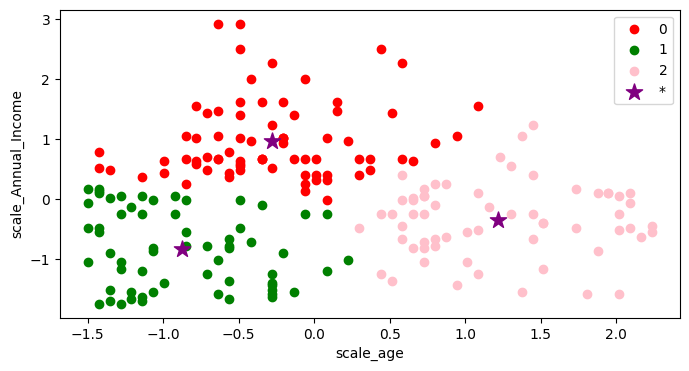

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(a1.scale_age,a1.scale_Annual_Income,color='red',label='0')
plt.scatter(a2.scale_age,a2.scale_Annual_Income,color='green',label='1')
plt.scatter(a3.scale_age,a3.scale_Annual_Income,color='pink',label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',s=150,marker='*',label='*')
plt.legend()
plt.xlabel('scale_age')
plt.ylabel('scale_Annual_Income')